(730, 1)

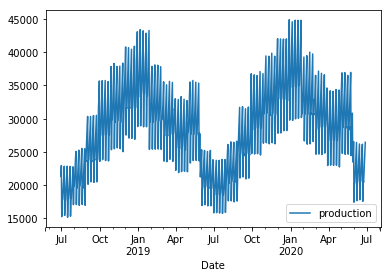

In [1]:
#importing packages and data and visualising the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_excel('timeseriesprod.xlsx')
df=df.set_index('Date')
df=df.dropna()
df.plot()
df.shape

In [2]:
df.head(5)

,production
Date,
2018-06-30,21280
2018-07-01,22911
2018-07-02,15199
2018-07-03,17806
2018-07-04,17789


In [3]:
from statsmodels.tsa.stattools import adfuller

In [4]:
#Running Augumented Dikyfuller Test
#Check for the p-value<0.05 means stationary otherwise make it satationary
def ad_test(data):
    dftest=adfuller(data,autolag='AIC')
    print('ADF:',dftest[0])
    print('p-value:',dftest[1])
    print('no of lags',dftest[2])
    print('no of observations used for critical values calculation:',dftest[3])
    for key,val in dftest[4].items():
        print('\t',key," :",val)
ad_test(df['production'])   

ADF: -2.2621056915654867
p-value: 0.1844809522366478
no of lags 14
no of observations used for critical values calculation: 715
	 1%  : -3.4395289262948894
	 5%  : -2.8655907692307694
	 10%  : -2.5689271030368235


In [24]:
#make the data stationary
diff=df.diff(periods=7)
diff=diff[7:]


In [25]:
diff.head()

,production
Date,
2018-07-07,29.0
2018-07-08,-100.0
2018-07-09,186.0
2018-07-10,-85.0
2018-07-11,-140.0


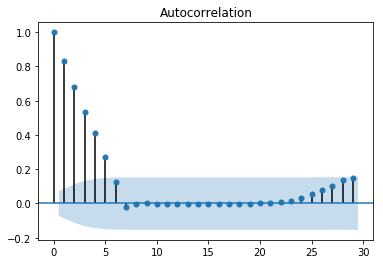

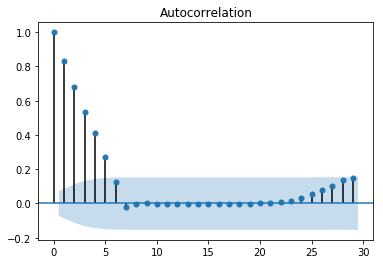

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff)

In [8]:
from pmdarima import auto_arima

In [9]:
fit=auto_arima(diff['production'],trace=True,suppress_warnings=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=12069.937, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12922.764, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12078.574, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12458.663, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12920.947, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=12080.024, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=12074.986, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=12029.162, Time=0.87 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=12070.431, Time=0.35 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=12030.911, Time=0.82 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=12031.020, Time=0.59 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=12056.338, Time=0.62 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=12072.280, Time=0.54 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=12028.108, Time=1.08 sec
 ARIMA(5,0,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  723
Model:               SARIMAX(5, 0, 5)   Log Likelihood               -5959.185
Date:                Sun, 27 Dec 2020   AIC                          11940.370
Time:                        22:35:14   BIC                          11990.787
Sample:                             0   HQIC                         11959.830
                                - 723                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1174      0.177      6.325      0.000       0.771       1.464
ar.L2         -1.0684      0.279     -3.835      0.000      -1.614      -0.522
ar.L3          0.7615      0.282      2.697      0.007       0.208       1.315
ar.L4         -0.3851      0.222     -1.736      0.083      -0.820       0.050
ar.L5          0.1414      0.101      1.398      0.162      -0.057       0.340
ma.L1         -0.3281      0.177     -1.850      0.064      -0.676       0.020
ma.L2          1.0009      0.154      6.509      0.000       0.700       1.302
ma.L3         -0.1282      0.215     -0.596      0.551      -0.550       0.294
ma.L4          0.5240      0.132      3.970      0.000       0.265       0.783
ma.L5          0.3207      0.101      3.183      0.001       0.123       0.518
sigma2      9.597e+05   1.75e+04     54.981      0.000    9.26e+05    9.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             22587.24
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                            -1.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
train_data=df.iloc[:-30]
test_data=df.iloc[-30:]


In [28]:
#Training the model
forecast_model=ARIMA(train_data['production'],order=(5,0,5))
model=forecast_model.fit()
model.summary()

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             production   No. Observations:                  700
Model:                     ARMA(5, 5)   Log Likelihood               -6374.214
Method:                       css-mle   S.D. of innovations           2158.288
Date:                Sun, 27 Dec 2020   AIC                          12772.429
Time:                        22:37:24   BIC                          12827.042
Sample:                    06-30-2018   HQIC                         12793.540
                         - 05-29-2020                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.914e+04   4118.753      7.075      0.000    2.11e+04    3.72e+04
ar.L1.production     0.4741      0.012     38.806      0.000       0.450       0.498
ar.L2.production     0.7639      0.016     47.688      0.000       0.733       0.795
ar.L3.production    -0.8062      0.011    -73.138      0.000      -0.828      -0.785
ar.L4.production    -0.4020      0.017    -24.162      0.000      -0.435      -0.369
ar.L5.production     0.9592      0.012     78.537      0.000       0.935       0.983
ma.L1.production    -0.1583      0.024     -6.570      0.000      -0.206      -0.111
ma.L2.production    -0.9058      0.022    -40.910      0.000      -0.949      -0.862
ma.L3.production     0.9318      0.026     35.513      0.000       0.880       0.983
ma.L4.production     0.4625      0.025     18.310      0.000       0.413       0.512
ma.L5.production    -0.6840      0.023    -29.502      0.000      -0.729      -0.639
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9171           -0.4422j            1.0182           -0.4285
AR.2           -0.9171           +0.4422j            1.0182            0.4285
AR.3            0.6247           -0.7820j            1.0009           -0.1427
AR.4            0.6247           +0.7820j            1.0009            0.1427
AR.5            1.0039           -0.0000j            1.0039           -0.0000
MA.1           -0.9851           -0.2951j            1.0284           -0.4537
MA.2           -0.9851           +0.2951j            1.0284            0.4537
MA.3            0.6608           -0.7790j            1.0214           -0.1380
MA.4            0.6608           +0.7790j            1.0214            0.1380
MA.5            1.3250           -0.0000j            1.3250           -0.0000
-----------------------------------------------------------------------------
"""

In [29]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
forecast=model.predict(start=start,end=end,typ='levels')
print(forecast)

2020-05-30    29838.807124
2020-05-31    34313.715418
2020-06-01    23115.725420
2020-06-02    29166.158825
2020-06-03    22253.241556
2020-06-04    29342.407087
2020-06-05    31338.014119
2020-06-06    30099.624501
2020-06-07    33904.210228
2020-06-08    23672.660728
2020-06-09    28724.616927
2020-06-10    22648.277248
2020-06-11    29158.172328
2020-06-12    31291.748784
2020-06-13    30330.173214
2020-06-14    33544.376622
2020-06-15    24168.462039
2020-06-16    28340.796533
2020-06-17    22998.111152
2020-06-18    28996.888428
2020-06-19    31247.517729
2020-06-20    30533.818454
2020-06-21    33228.375802
2020-06-22    24610.268651
2020-06-23    28007.748943
2020-06-24    23308.195953
2020-06-25    28855.651415
2020-06-26    31205.241294
2020-06-27    30713.549303
2020-06-28    32951.048159
Freq: D, dtype: float64


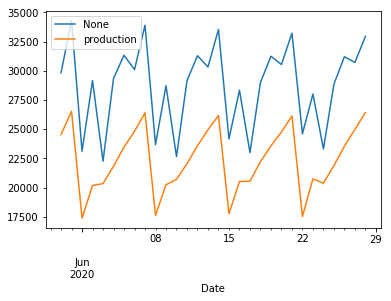

In [30]:
forecast.plot(legend=True)
test_data['production'].plot(legend=True)